In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use("ggplot")
from sklearn import datasets
from sklearn.decomposition import PCA

In [1]:
from pkg_resources import get_distribution
import platform
print("python", platform.python_version())
print("")
libs = ["pandas", "numpy", "matplotlib", "scikit-learn"]
for lib in libs:
    version = get_distribution(lib).version
    print(lib, version)

python 3.5.2

pandas 0.20.3
numpy 1.13.1
matplotlib 2.0.2
scikit-learn 0.18.2


In [2]:
# irisデータセット
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns= iris["feature_names"] + ["target"])
print(len(data))
display(data.head())

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


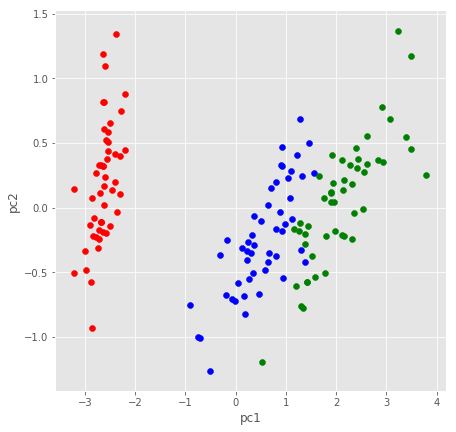

各次元の寄与率:  [ 0.92461621  0.05301557]
累積寄与率:  0.977631775025


In [19]:
# 主成分分析

t = data["target"]
x_label = iris["feature_names"] # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x = data[x_label]
pca = PCA(n_components=2) # 主成分の数は2とする
pca.fit(x) # モデルフィッティング
# 主成分軸でクラスプロット
transformed = pca.fit_transform(x)
plt.figure(figsize=(7,7))
colors = ["red", "blue", "green"] # targetが 0=red, 1=blue, 2=greenでプロットする
for label in np.unique(t):
    plt.scatter(transformed[t == label, 0], transformed[t == label, 1], color=[colors[int(label)]])
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()
print("各次元の寄与率: ", pca.explained_variance_ratio_)
print("累積寄与率: ", sum(pca.explained_variance_ratio_))